## OpenAI Gym Warm-Up (4 x 4 map)

In [1]:
# Import Environment class and Libraries
from frozen_lake import FrozenLakeEnv
import numpy as np
import sys
import matplotlib.pyplot as plt
import time


# Create Environment Object
env = FrozenLakeEnv(map_name ="4x4", is_slippery=False)


# Access the number of states:
nS = env.observation_space
print("State space of the Env: ", nS)

# or you could even use 
nS = env.nS
print("State space of the Env by accessing env.nS: ", nS)


# Action space of the agent:
nA = env.nA
print("Action space of the Env: ", nA)

"""
For policy iteration, you would need to access
State(s), Action(a), Next State(ns), Reward(r), episode ended? (is_done) tuples.

Note that in this environment, the orientation of the agent does not matter.
No matter what direction the agent is facing, if, say a left action is performed, 
the agent moves to the left of the crrent state.
"""

# For actions, this is the corresponding dictionary:
action_names = {0:'L', 1:'D', 2:"R", 3:"U"}

"""
Here, 
'L' means left
'D' means down
'R' means right
'U' means up



You can access these tuples by simply env.P[s][a].
where 's' is state, and 'a' is action. For example, let's say we are at state '4',
and we take an action '1' or "Down". The next state (ns) would be 8, the episode would not have ended (is_done), 
the reward (r) is 0 and the transition probabilty (prob) is 1 because this is a deterministic setting.
"""
prob, ns, r, is_done = env.P[0][0][0]

print("Transition Probabilty: ", prob)
print("Next State: ", ns)
print("Reward: ", r)
print("Episode ended? : ", is_done)
# Note that we need to add a [0] after env.P[s][a] because it returns a list containing the tuple

State space of the Env:  16
State space of the Env by accessing env.nS:  16
Action space of the Env:  4
Transition Probabilty:  1.0
Next State:  0
Reward:  0.0
Episode ended? :  False


## Policy Iteration 

- Follow the pseudo-code given in the handout for this section

In [2]:
def print_policy(policy, action_names, states):
    """Print the policy in human-readable format.
    If you've implemented this correctly, the output (for 4x4 map) should be:
    
    D R D L 
    D L D L 
    R D D L 
    L R R L 
    
    Parameters
    ----------
    policy: np.ndarray
        Array of state to action number mappings
    action_names: dict
        Mapping of action numbers to characters representing the action.
    num_states: int
        Number of states in the FrozenLakeEnvironment (16 or 64 for 4x4 or 8x8 maps respectively)      
    """
    
    # WRITE YOUR CODE HERE:
    ct=0
    for i in range(int(np.sqrt(states))):
        for j in range(int(np.sqrt(states))):
            print(action_names[policy[ct]],end= ' ')
            ct+=1
        print('', end='\n')
    
        

In [3]:
def evaluate_policy_sync(env, gamma, policy, value_func, max_iterations=int(1e3), tol=1e-3):
    """Performs policy evaluation.
    
    Evaluates the value of a given policy.

    Parameters
    ----------
    env: Frozen Lake Environment
      The environment to compute value iteration for.
    gamma: float
      Discount factor, must be in range [0, 1)
    policy: np.array
      The policy to evaluate. Maps states to actions.
    value_func: np.array
      Array of scalar values for each state
    max_iterations: int
      The maximum number of iterations to run before stopping.
    tol: float
      Determines when value function has converged.

    Returns
    -------
    np.ndarray, int
      The value for the given policy and the number of iterations till
      the value function converged.
    """
    
    val_iter=0
    # WRITE YOUR CODE HERE:
    
    while(1):
        val_iter += 1
        delta = 0
        for i in range(len(policy)):
            prev_val = value_func[i]
            prob, ns, r, is_done = env.P[i][policy[i]][0]

            value_func[i] = value_func[ns]*gamma + r
            
            delta = max(delta, np.abs(prev_val - value_func[i]))

        if delta<tol:
            break

    new_value_func = value_func

    return new_value_func, val_iter

In [4]:
def improve_policy(env, gamma, value_func, policy):
    """Performs policy improvement.
    
    Given a policy and value function, improves the policy.

    Parameters
    ----------
    env: Frozen Lake Environment
      The environment to compute value iteration for.
    gamma: float
      Discount factor, must be in range [0, 1)
    value_func: np.ndarray
      Value function for the given policy.
    policy: dict or np.array
      The policy to improve. Maps states to actions.

    Returns
    -------
    bool, np.ndarray
      Returns the new imporved policy.
    """
    
    # WRITE YOUR CODE HERE:
    stable = 1
    for i in range(len(policy)):
        prev_pol = policy[i]
        val_temp = np.zeros((4))
        for i1 in range(4):
            prob, ns, r, is_done = env.P[ i ][ i1 ][0]
            val_temp[i1] =  r + gamma*value_func[ns]

        policy[i] = np.argmax(val_temp)

        if policy[i]!=prev_pol:
            stable = 0

    new_policy = policy

    return stable, new_policy

In [5]:
def policy_iteration_sync(env, gamma, max_iterations=int(1e3), tol=1e-3):
    
    """
    Runs policy iteration.

    See page 85 of the Sutton & Barto Second Edition book.

    You should call the improve_policy() and evaluate_policy_sync() methods to
    implement this method.
    
    If you've implemented this correctly, it should take much less than 1 second.
    
    Parameters
    ----------
    env: Frozen Lake Environment
      The environment to compute value iteration for.
    gamma: float
      Discount factor, must be in range [0, 1)
    max_iterations: int
      The maximum number of iterations to run before stopping.
    tol: float
      Determines when value function has converged.

    Returns
    -------
    (np.ndarray, np.ndarray, int, int)
       Returns optimal policy, value function, number of policy
       improvement iterations, and number of value iterations.
    """  
    policy = np.random.randint(0, 4, size=env.nS)   #Define random policy
    value_func = np.zeros(env.nS)    # Define initial value function
    num_pol_iter = 0
    num_val_iter = 0
    value_func_list = np.zeros((value_func.shape[0], 100))
    
    # WRITE YOUR CODE HERE:
    while(num_pol_iter<max_iterations):
        num_pol_iter += 1
        value_func, num_val_temp = evaluate_policy_sync(env, gamma, policy, value_func)
        
        value_func_list[:,num_pol_iter] = value_func

        num_val_iter += num_val_temp
        stable, policy= improve_policy(env, gamma, value_func, policy)        

        if stable:
            new_policy = policy
            break
    value_func_list = np.array(value_func_list)

    return new_policy, value_func, num_pol_iter, num_val_iter ,value_func_list

In [6]:
def main():
    
    # WRITE YOUR CODE HERE:
    policy, value_func, num_pol_iter, num_val_iter, value_func_list = policy_iteration_sync(env, 0.9)
    
    return policy, value_func, num_pol_iter, num_val_iter, value_func_list
    
if __name__ == "__main__":
    t = time.time()
    policy, value_func, num_pol_iter, num_val_iter,  value_func_list= main()
    elapsed = time.time() - t

In [7]:
print('Time taken = ', elapsed)
print('Policy improvement steps = ', num_pol_iter)
print('Policy evaluation steps = ', num_val_iter)

Time taken =  0.0009958744049072266
Policy improvement steps =  6
Policy evaluation steps =  12


Part B
(16, 100) 6


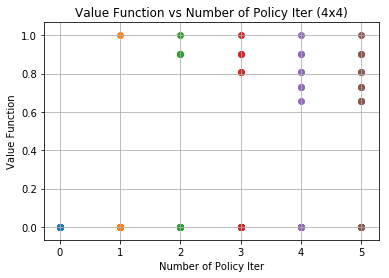

In [11]:
print('Part B')
print(value_func_list.shape, num_pol_iter)
for i in range(num_pol_iter):
    plt.scatter(np.ones(env.nS)*i, value_func_list[:,i])
if env.nS == 16:
    plt.title('Value Function vs Number of Policy Iter (4x4)')
    plt.xlabel('Number of Policy Iter')
    plt.ylabel('Value Function')
else:
    plt.title('Value Function vs Number of Policy Iter (8x8)')
    plt.xlabel('Number of Policy Iter')
    plt.ylabel('Value Function')
plt.grid()
plt.show()

In [9]:
import seaborn as sns

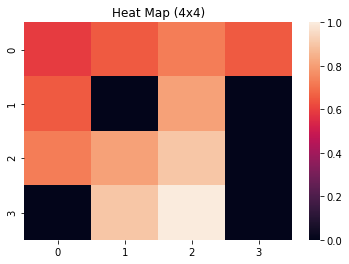

In [10]:
ax = sns.heatmap(value_func_list[:,num_pol_iter].reshape(int(np.sqrt(env.nS)),int(np.sqrt(env.nS))))
if env.nS==16:
    plt.title('Heat Map (4x4)')
else:
    plt.title('Heat Map (8x8)')
plt.show()
pass